In [1]:
!pip install pmdarima

zsh:1: command not found: pip


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("../Data/Data_25_Companies/ADANIGREEN_minute.csv")
df.head()

,date,open,high,low,close,volume
0,2018-06-18 09:44:00,30.0,30.0,30.0,30.0,1413185
1,2018-06-18 09:45:00,30.0,30.0,30.0,30.0,0
2,2018-06-18 09:46:00,30.0,30.0,30.0,30.0,0
3,2018-06-18 09:47:00,30.0,30.0,30.0,30.0,0
4,2018-06-18 09:48:00,30.0,30.0,30.0,30.0,0


In [24]:
dataset_ex_df = df.copy()
dataset_ex_df['date'] = pd.to_datetime(dataset_ex_df['date'])
dataset_ex_df.set_index('date', inplace=True)
dataset_ex_df = dataset_ex_df['close'].resample('D').last().to_frame()

In [25]:
dataset_ex_df

,close
date,
2018-06-18,31.50
2018-06-19,33.05
2018-06-20,31.00
2018-06-21,29.45
2018-06-22,29.70
...,...
2025-07-21,1037.00
2025-07-22,1014.70
2025-07-23,1034.20


In [7]:
dataset_ex_df.value_counts()

close      
1078.747867    2
1921.839067    2
24.947200      1
1194.686000    1
1204.553600    1
              ..
688.050000     1
682.700000     1
680.100000     1
674.282267     1
2994.511733    1
Name: count, Length: 1760, dtype: int64

In [27]:
# dataset_ex_df = dataset_ex_df.iloc[10000:100000]
display(dataset_ex_df.head(10))
display(dataset_ex_df.tail())

,close
date,
2018-06-18,31.50
2018-06-19,33.05
2018-06-20,31.00
2018-06-21,29.45
2018-06-22,29.70
2018-06-23,NaN
2018-06-24,NaN
2018-06-25,28.80
2018-06-26,29.00


,close
date,
2025-07-21,1037.0
2025-07-22,1014.7
2025-07-23,1034.2
2025-07-24,1020.9
2025-07-25,979.2


In [35]:
history

[array([31.5]),
 array([33.05]),
 array([31.]),
 array([29.45]),
 array([29.7]),
 array([nan]),
 array([nan]),
 array([28.8]),
 array([29.]),
 array([27.4]),
 array([26.05]),
 array([27.35]),
 array([nan]),
 array([nan]),
 array([25.45]),
 array([26.6]),
 array([29.8]),
 array([29.75]),
 array([30.5]),
 array([nan]),
 array([nan]),
 array([30.65]),
 array([31.]),
 array([31.85]),
 array([31.15]),
 array([31.3]),
 array([nan]),
 array([nan]),
 array([31.25]),
 array([31.5]),
 array([29.7]),
 array([30.15]),
 array([35.6]),
 array([nan]),
 array([nan]),
 array([42.45]),
 array([46.65]),
 array([51.3]),
 array([53.2]),
 array([52.25]),
 array([nan]),
 array([nan]),
 array([57.55]),
 array([60.4]),
 array([63.4]),
 array([66.55]),
 array([69.85]),
 array([nan]),
 array([nan]),
 array([73.3]),
 array([69.65]),
 array([66.2]),
 array([62.9]),
 array([66.]),
 array([nan]),
 array([nan]),
 array([62.7]),
 array([59.6]),
 array([nan]),
 array([56.65]),
 array([54.9]),
 array([nan]),
 array([nan

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
model = ARIMA(history, order=(1,1,1))  # Try better ARIMA order
model_fit = model.fit(method_kwargs={"maxiter": 200})

    # Make the prediction
output = model_fit.forecast()
yhat = output[0]
yhat


np.float64(1039.2705713266798)

In [33]:
ARIMA??

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
    validate_specification=True,
)
Source:        
class ARIMA(sarimax.SARIMAX):
    r"""
    Autoregressive Integrated Moving Average (ARIMA) model, and extensions

    This model is the basic interface for ARIMA-type models, including those
    with exogenous regressors and those with seasonal components. The most
    general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
    all specialized cases, including

    - autoregressive models: AR(p)
    - moving average models: MA(q)
    - mixed autoregressive moving average models: ARMA(p, q)
    - integration models: ARIMA(p, d, q)
    - seasonal models: SARIMA(P, D, Q, s)
    - regression with errors that follow one of the above ARIMA-type 

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    # model = ARIMA(history, order=(0,1,0))
    # model_fit = model.fit(method='nm')
    model = ARIMA(history, order=(1,1,1))  # Try better ARIMA order
    model_fit = model.fit(method_kwargs={"maxiter": 200})

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    return yhat

# Split data into train and test sets
Y = dataset_ex_df.values
lenght = len(Y)
# Since we changed to daily data, the size needs to be adjusted.
# Let's use a fixed number of days for training, e.g., 80% of the days.
size = int(lenght * 0.8)
train, test = Y[0:size], Y[size:lenght]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    #history.append(obs)
    history.append(yhat[0])

IndexError: invalid index to scalar variable.

In [29]:
yhat.shape


()

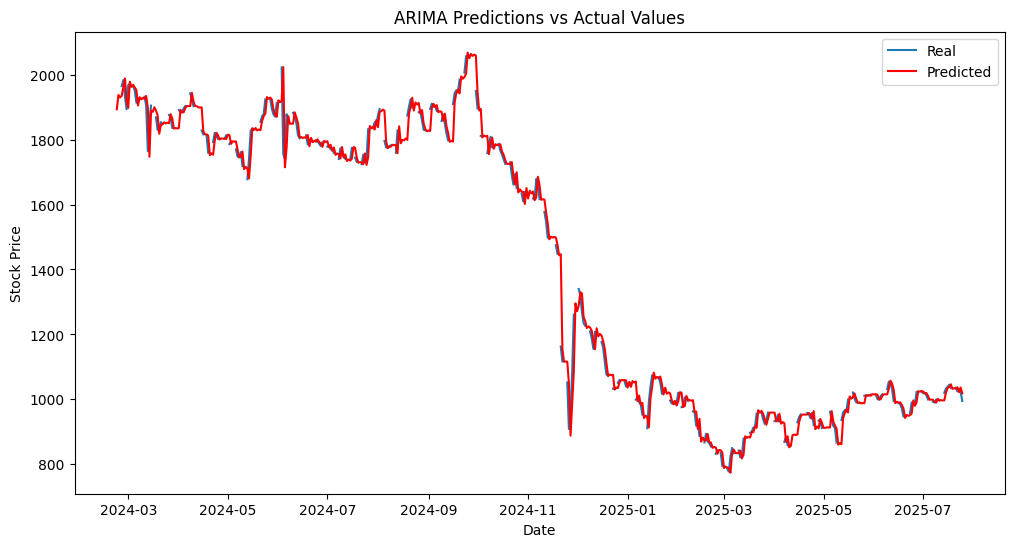

In [10]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score
import numpy as np

# Ensure both test and predictions are flattened numpy arrays
test_flat = np.array(test).flatten()
predictions_flat = np.array(predictions).flatten()

# Identify NaN values in test_flat
# We need to remove corresponding NaNs from both arrays to ensure alignment
valid_indices = ~np.isnan(test_flat)

# Filter out NaN values from both arrays
test_filtered = test_flat[valid_indices]
predictions_filtered = predictions_flat[valid_indices]

# Calculate R2 score on the filtered data
r2 = r2_score(test_filtered, predictions_filtered)
print(f"R2 Score: {r2}")

R2 Score: 0.991425234484976


Total usable points: 1762
Train size: 1409
Test size : 353


/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


Points kept for evaluation: 353 of 353
RMSE: 40.2788
MAE : 25.5129
MAPE: 1.89%


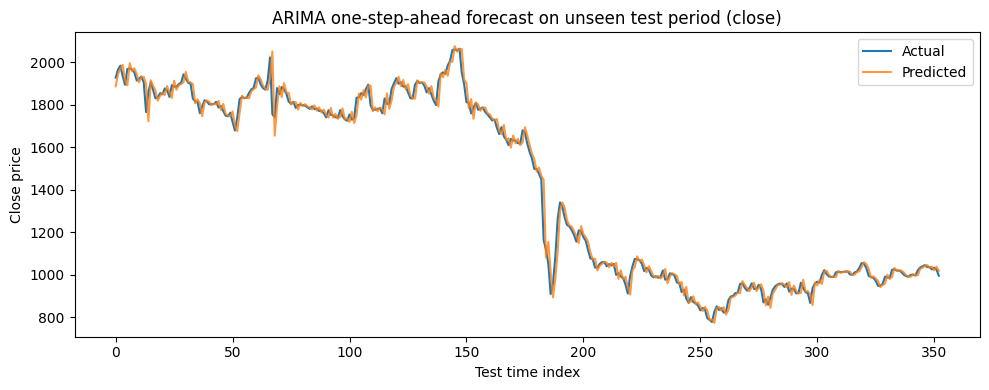

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# ============================================================
# 1. Prepare target series (UNIVARIATE) and clean it
# ============================================================

# Use closing price as target; change to 'log_return_1d' if you prefer
y = dataset_ex_df["close"].astype(float)

# Remove inf / -inf, then drop NaNs
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Convert to numpy array
y = y.values

print("Total usable points:", len(y))

# ============================================================
# 2. Train / Test split (time-based, unseen future segment)
# ============================================================

train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

print("Train size:", len(train))
print("Test size :", len(test))

# ============================================================
# 3. Define ARIMA forecast function
# ============================================================

def arima_forecast(history):
    """
    Fit ARIMA to 'history' (1D list/array) and return
    a one-step-ahead forecast.
    """
    model = ARIMA(history, order=(1, 1, 1))   # adjust order if needed
    model_fit = model.fit(method_kwargs={"maxiter": 200})
    yhat = model_fit.forecast()[0]
    return yhat

# ============================================================
# 4. Walk-forward validation on TEST (unseen) data
# ============================================================

history = list(train)    # start with training data only
predictions = []

for t in range(len(test)):
    # Predict next value using only data up to time t-1
    yhat = arima_forecast(history)
    predictions.append(yhat)

    # Append the TRUE observed test value (not the prediction)
    history.append(test[t])

# Convert to numpy arrays
test_arr = np.array(test, dtype=float)
pred_arr = np.array(predictions, dtype=float)

# ============================================================
# 5. Remove any remaining NaNs/infs before metrics
# ============================================================

mask = np.isfinite(test_arr) & np.isfinite(pred_arr)
test_clean = test_arr[mask]
pred_clean = pred_arr[mask]

print("Points kept for evaluation:", mask.sum(), "of", len(mask))

# ============================================================
# 6. Evaluation metrics on unseen test period
# ============================================================

rmse = np.sqrt(mean_squared_error(test_clean, pred_clean))
mae = mean_absolute_error(test_clean, pred_clean)
mape = np.mean(np.abs((test_clean - pred_clean) / test_clean)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# ============================================================
# 7. Visual comparison: actual vs predicted on TEST
# ============================================================

plt.figure(figsize=(10, 4))
plt.plot(test_clean, label="Actual", linewidth=1.5)
plt.plot(pred_clean, label="Predicted", alpha=0.8)
plt.title("ARIMA one-step-ahead forecast on unseen test period (close)")
plt.xlabel("Test time index")
plt.ylabel("Close price")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
r2 = r2_score(test_clean, pred_clean)
r2

0.9910327677729006